# Exploring GMCAD

Before Exploring GMCAD, we reommend you read the article *GMCAD: an original Synthetic Dataset of 2D Designs along their Geometrical and Mechanical Conditions* accepted to the conference ISM 2021 to understand the objective and inception of GMCAD.

## Downloading GMCAD

To download the designs in their .png format and their parameters, use the link https://drive.google.com/file/d/1fNnuKPTVygAM3UQgdeFdi9CJtvKGaCGG/view .

To download the cads in their .vtk format, use the link https://drive.google.com/file/d/1yRSBJhvPiOuNwdnbbIEqZepAjNNwYqiR/view?usp=sharing .

GMCAD dataset is split into 3 sets: **train**, **validation** and **test** sets. <br>
In each folder, there is 2 sub-folders: "designs" and "parameters". <br>
In "designs", you will find the 2D truss-like designs in the .png format. <br>
In "parameters", you will find an excel file with all geoemtric and mechanical parameters of every design.

## Exploring the variables in GMCAD
GMCAD's variables can be divided to 3 parts:
- The designs references: **design_reference** is the ID of every design and a key to match each design to its parameters
- The mechanial variables: the mechanical variables are the mechanical constraints of every design, these constraints were predicted by Deep Learning Mechanical-conditions predictors as explained in the article.
- The geometrical variables: the geometrical variables are the geometrical constraints of every design (lengths, widths, angles, etc.)

**GMCAD's mechanical variables are:**
- Boundary conditions: BC_nodes
- Loads configurations: F_nodes, F_tetas, F_values
- volume fraction: volume_fractions
- compliance (in Joules): compliance_synthetic_designs

**GMCAD's geometrical variables are:**
- Overhang:  angle_rotation, overhangs_in_design, min_overhang 
- beam-length: bars_lengths, min_bar_length, average_bar_length, max_bar_length,normalized_bars_lengths, min_normalized_bar_length, average_normalized_bar_length, max_normalized_bar_length,
- beam-width:  normalized_bars_widths, min_normalized_bar_width, average_normalized_bar_width, max_normalized_bar_width, bars_widths, min_bar_width, average_bar_width, max_bar_widgth  
- number of beams: number_of_bars
- beams coordinates: bars_coordinates

***NB:*** <br>
*Every design was rotated 3 times (i.e. it exists in 4 states). <br>
The build direction is set to the y-axis.<br>
The variable angle_rotation is very important because designs were saved with no rotation (i.e. angle of rotation = 0°) and only their parameters were computed and saved for different orientations. In fact, the only parameters that are affected with rotation are the BC_nodes, F_nodes and overhangs. <br>
BC_nodes and F_nodes are simply transformed into 2D matrices and rotated afterwards according to the angle of rotation variable (the transformation is coded in the function draw_mechanical_constraints_on_design below). <br>
However, the overhangs were already computed accounting for the rotation.<br>*

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

In [2]:
parameters_of_train_set = pd.read_excel('./data_shared/train/parameters/train_meca_geom.xlsx', 'data')

In [3]:
parameters_of_train_set.columns

Index(['design_reference', 'angle_rotation', 'overhangs_in_design',
       'min_overhang', 'BC_nodes', 'F_nodes', 'F_tetas', 'F_values',
       'volume_fractions', 'compliance_synthetic_designs', 'number_of_bars',
       'min_normalized_bar_length', 'average_normalized_bar_length',
       'max_normalized_bar_length', 'min_bar_length', 'average_bar_length',
       'max_bar_length', 'min_normalized_bar_width',
       'average_normalized_bar_width', 'max_normalized_bar_width',
       'min_bar_width', 'average_bar_width', 'max_bar_widgth', 'bars_lengths',
       'normalized_bars_lengths', 'bars_widths', 'normalized_bars_widths',
       'bars_coordinates'],
      dtype='object')

In [4]:
# For the design "2021-05-25 12_40_17_357", all parameters are alike except for the variables "angle_rotation", "overhangs_in_design" and "min_overhang"
parameters_of_train_set[parameters_of_train_set.design_reference=='2021-05-25 12_40_17_357']

,design_reference,angle_rotation,overhangs_in_design,min_overhang,BC_nodes,F_nodes,F_tetas,F_values,volume_fractions,compliance_synthetic_designs,...,average_normalized_bar_width,max_normalized_bar_width,min_bar_width,average_bar_width,max_bar_widgth,bars_lengths,normalized_bars_lengths,bars_widths,normalized_bars_widths,bars_coordinates
12000,2021-05-25 12_40_17_357,90,"[0.0, 90.00000000000001, 30.465544919459887, 1...",0.000000,"[10197, 10198, 10199, 100, 201, 302, 403, 504,...",[9797],[29.0],[1.0],0.13229,100.414207,...,0.0175,0.02,0.1,0.175,0.2,"[10, 5.882352941176471, 11.601813484303541, 10...","[1.0, 0.5882352941176472, 1.1601813484303543, ...","[0.2, 0.2, 0.1, 0.2]","[0.019999999999999907, 0.019999999999999907, 0...","[[[0.0, 0.0], [-0.2, 0.0], [-0.2, -10.0], [0.0..."
24817,2021-05-25 12_40_17_357,270,"[180.0, 90.0, 149.5344550805401, 22.0884424798...",22.088442,"[10197, 10198, 10199, 100, 201, 302, 403, 504,...",[9797],[29.0],[1.0],0.13229,100.414207,...,0.0175,0.02,0.1,0.175,0.2,"[10, 5.882352941176471, 11.601813484303541, 10...","[1.0, 0.5882352941176472, 1.1601813484303543, ...","[0.2, 0.2, 0.1, 0.2]","[0.019999999999999907, 0.019999999999999907, 0...","[[[0.0, 0.0], [-0.2, 0.0], [-0.2, -10.0], [0.0..."
34509,2021-05-25 12_40_17_357,0,"[90.0, 0.0, 59.53445508054013, 67.91155752011632]",0.000000,"[10197, 10198, 10199, 100, 201, 302, 403, 504,...",[9797],[29.0],[1.0],0.13229,100.414207,...,0.0175,0.02,0.1,0.175,0.2,"[10, 5.882352941176471, 11.601813484303541, 10...","[1.0, 0.5882352941176472, 1.1601813484303543, ...","[0.2, 0.2, 0.1, 0.2]","[0.019999999999999907, 0.019999999999999907, 0...","[[[0.0, 0.0], [-0.2, 0.0], [-0.2, -10.0], [0.0..."
61986,2021-05-25 12_40_17_357,180,"[90.0, 180.0, 120.46554491945989, 112.08844247...",90.000000,"[10197, 10198, 10199, 100, 201, 302, 403, 504,...",[9797],[29.0],[1.0],0.13229,100.414207,...,0.0175,0.02,0.1,0.175,0.2,"[10, 5.882352941176471, 11.601813484303541, 10...","[1.0, 0.5882352941176472, 1.1601813484303543, ...","[0.2, 0.2, 0.1, 0.2]","[0.019999999999999907, 0.019999999999999907, 0...","[[[0.0, 0.0], [-0.2, 0.0], [-0.2, -10.0], [0.0..."


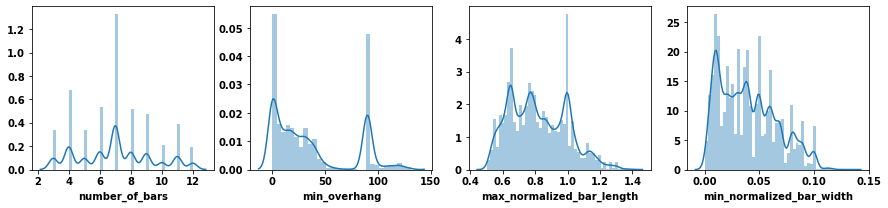

In [5]:
fig, axes = plt.subplots(ncols=4, figsize=(15,3))
sns.distplot(parameters_of_train_set.number_of_bars, ax=axes[0])
sns.distplot(parameters_of_train_set.min_overhang, ax=axes[1])
sns.distplot(parameters_of_train_set.max_normalized_bar_length, ax=axes[2])
sns.distplot(parameters_of_train_set.min_normalized_bar_width, ax=axes[3])

## Visualizing designs from the train set

(<matplotlib.image.AxesImage at 0x1bd184e4240>,)

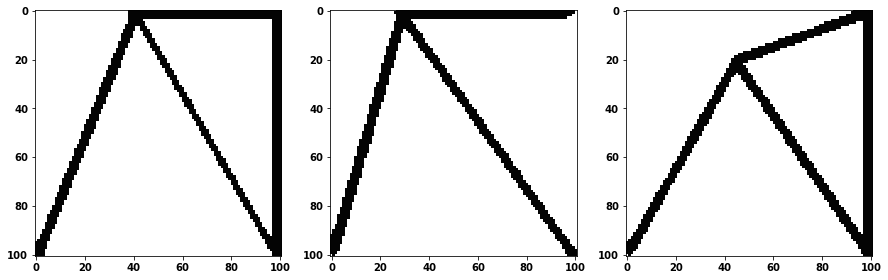

In [6]:
import cv2
picked_designs = ['2021-05-25 12_40_17_357', '2021-05-25 12_40_17_390', '2021-05-25 12_40_17_389']
images = [cv2.imread('./data_shared/train/designs/'+d+'.png', 0) for d in picked_designs]

fig, axes = plt.subplots(1, 3, figsize=(15,15))

axes[0].imshow(255-images[0], cmap='gray', vmin=0, vmax=255),
axes[1].imshow(255-images[1], cmap='gray', vmin=0, vmax=255),
axes[2].imshow(255-images[2], cmap='gray', vmin=0, vmax=255),


In [17]:
def draw_mechanical_constraints_on_design(design, F_nodes, F_tetas, BC_nodes):
    # Reshaping mechanical parameters into 2D matrices
    dim = (101, 101)
    load_nodes = list(map(int, F_nodes.replace('[', '').replace(']', '').split(',')))
    angles = list(map(float, F_tetas.replace('[', '').replace(']', '').split(',')))
    F = np.zeros(dim) 
    for ind in range(len(load_nodes)):
        l = load_nodes[ind]
        angle = float(angles[ind])*np.pi/180
        j = l//(dim[1])
        i = l%(dim[0])
        F[i,j] = angle
    F = blur_matrix_with_fixed_filter_value(F)
        
    fixed_nodes = list(map(int, BC_nodes.replace('[', '').replace(']', '').split(',')))
    BC = np.zeros(dim)
    for f in fixed_nodes:
        j = f//(dim[1])
        i = f%(dim[0])
        BC[i,j] = 1.0

    # Reading 2D design
    design = 255-cv2.imread('./data_shared/train/designs/'+design+'.png')
    design = cv2.resize(design, dim, interpolation = cv2.INTER_AREA)
    rows, cols = np. where(F>0)
    for i in range(len(rows)):
        design[rows[i], cols[i]] = [0,255,0]

    rows, cols = np. where(BC>0)
    for i in range(len(rows)):
        design[rows[i], cols[i]] = [ 255,0,0]
    return design

In [18]:
def blur_matrix_with_fixed_filter_value(matrix, filt_size=5):
    """
    This matrix repeates the load value in location i,j in a radius of filt_size around the value.
    It helps the matrix to become more dense (less zero values), and hence, more visible.
    """
    indices = matrix.nonzero()
    vals = matrix[matrix.nonzero()]       
    blur = cv2.blur(matrix,(filt_size,filt_size))
    blur[blur>0] = 1.0
    nx, ny = indices
    for k in range(len(nx)) :
        x = nx[k]
        y = ny[k]
        o, r = np.divmod(filt_size, 2)
        l = (x-(o+r-1)).clip(0)
        u = (y-(o+r-1)).clip(0)
        blur[l: x+o+1, u:y+o+1] = vals[k]
    return blur
    

(<matplotlib.image.AxesImage at 0x1bd15fae2e8>,)

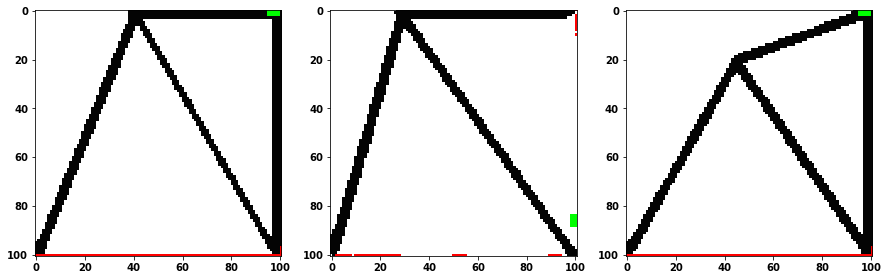

In [19]:
designs_with_mechanical_conditions = [
    draw_mechanical_constraints_on_design(design=d, 
                                          F_nodes = parameters_of_train_set[(parameters_of_train_set.design_reference==d) & (parameters_of_train_set.angle_rotation==0)].F_nodes.tolist()[0],
                                          F_tetas = parameters_of_train_set[(parameters_of_train_set.design_reference==d) & (parameters_of_train_set.angle_rotation==0)].F_tetas.tolist()[0],
                                          BC_nodes = parameters_of_train_set[(parameters_of_train_set.design_reference==d) & (parameters_of_train_set.angle_rotation==0)].BC_nodes.tolist()[0]
                                         ) for d in picked_designs]

fig, axes = plt.subplots(1, 3, figsize=(15,15))

axes[0].imshow(designs_with_mechanical_conditions[0], cmap='gray', vmin=0, vmax=255),
axes[1].imshow(designs_with_mechanical_conditions[1], cmap='gray', vmin=0, vmax=255),
axes[2].imshow(designs_with_mechanical_conditions[2], cmap='gray', vmin=0, vmax=255),
